<a href="https://colab.research.google.com/github/lynnkuan/ML/blob/main/bayes_%26_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('test.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

labelencoder = LabelEncoder()
for col in bank.columns:
  bank[col] = labelencoder.fit_transform(bank[col])
print(bank.shape)
bank.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0


In [4]:
bank_scale = StandardScaler().fit_transform(bank.iloc[:,:-1])
pd.DataFrame(data=bank_scale)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.056886,1.716804,-0.246429,-1.644755,-0.130759,0.916941,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.847126,-0.595036,-0.397524,-0.325061,0.444413
1,-0.772983,0.795246,-0.246429,-0.309038,-0.130759,1.793905,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.128978,-0.595036,3.175235,2.083131,-2.579961
2,-0.583715,-0.126313,1.421396,1.026680,-0.130759,0.645162,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.307242,-0.595036,3.034205,0.276987,-2.579961
3,-1.056886,-0.126313,-0.246429,1.026680,-0.130759,0.722587,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.235937,0.406015,-0.397524,-0.325061,0.444413
4,1.687510,-1.047871,-0.246429,-0.309038,-0.130759,-0.980777,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.098419,-0.595036,-0.397524,-0.325061,0.444413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772983,0.795246,-0.246429,-0.309038,-0.130759,-1.225695,0.875617,-0.424756,-0.723642,1.707910,-0.179903,0.426186,0.739699,-0.397524,-0.325061,0.444413
4517,1.498241,0.488060,-0.246429,1.026680,7.647669,-1.413728,0.875617,2.354292,1.495133,-0.838546,0.819288,-0.470226,-0.595036,-0.397524,-0.325061,0.444413
4518,1.498241,1.409618,-0.246429,-0.309038,-0.130759,-0.532024,-1.142051,-0.424756,-0.723642,0.374052,-1.512157,-0.480412,2.741802,-0.397524,-0.325061,0.444413
4519,-1.246155,-1.047871,-0.246429,-0.309038,-0.130759,0.461868,-1.142051,-0.424756,-0.723642,-1.202326,-0.846030,-0.592464,0.406015,1.796275,1.481083,-1.571836


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bank_scale,bank['y'],test_size=0.3,random_state=42)

In [8]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score,roc_curve

cm= confusion_matrix(y_test,pred)
pd.DataFrame({'pred 0':cm[:,0],
              'pred 1':cm[:,1]})

,pred 0,pred 1
0,1047,158
1,79,73


In [12]:
fpr,tpr,thresholds = roc_curve(y_test,pred)
pd.DataFrame({'accuracy':accuracy_score(y_test,pred),
              'auc':auc(fpr,tpr),
              'precision':precision_score(y_test,pred),
              'recall':recall_score(y_test,pred),
              'f1':f1_score(y_test,pred),
              'fpr':fpr,
              'tpr':tpr})

,accuracy,auc,precision,recall,f1,fpr,tpr
0,0.82535,0.674571,0.316017,0.480263,0.381201,0.00000,0.000000
1,0.82535,0.674571,0.316017,0.480263,0.381201,0.13112,0.480263
2,0.82535,0.674571,0.316017,0.480263,0.381201,1.00000,1.000000


In [16]:
import pandas as pd
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, pred)

# 计算单个数值的指标
metrics_dict = {
    'accuracy': accuracy_score(y_test, pred),
    'auc': auc(fpr, tpr),
    'precision': precision_score(y_test, pred),
    'recall': recall_score(y_test, pred),
    'f1': f1_score(y_test, pred)
}

# 创建 DataFrame
metrics_df = pd.DataFrame([metrics_dict])  # 这里用列表包裹字典，确保是单行 DataFrame

# 创建 fpr/tpr 的 DataFrame
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

metrics_df

,accuracy,auc,precision,recall,f1
0,0.82535,0.674571,0.316017,0.480263,0.381201


In [17]:
roc_df

,fpr,tpr
0,0.00000,0.000000
1,0.13112,0.480263
2,1.00000,1.000000


Wine

In [23]:
wine = pd.read_csv('Wine.csv')
wine.drop(columns='Id',inplace=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [24]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


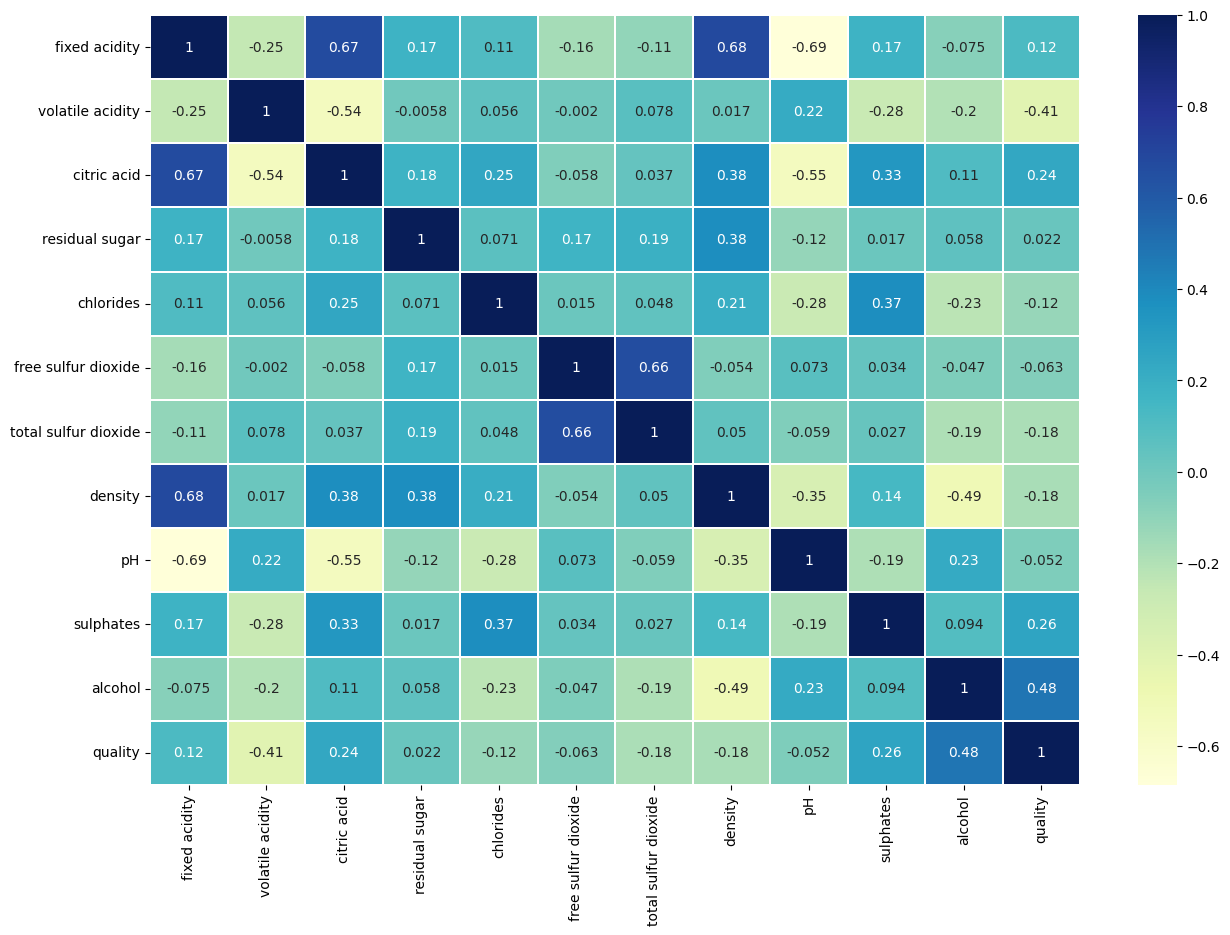

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(),linewidth=0.01,cmap='YlGnBu',linecolor='white',annot=True)
plt.show()
wine.corr()

<Axes: xlabel='quality', ylabel='alcohol'>

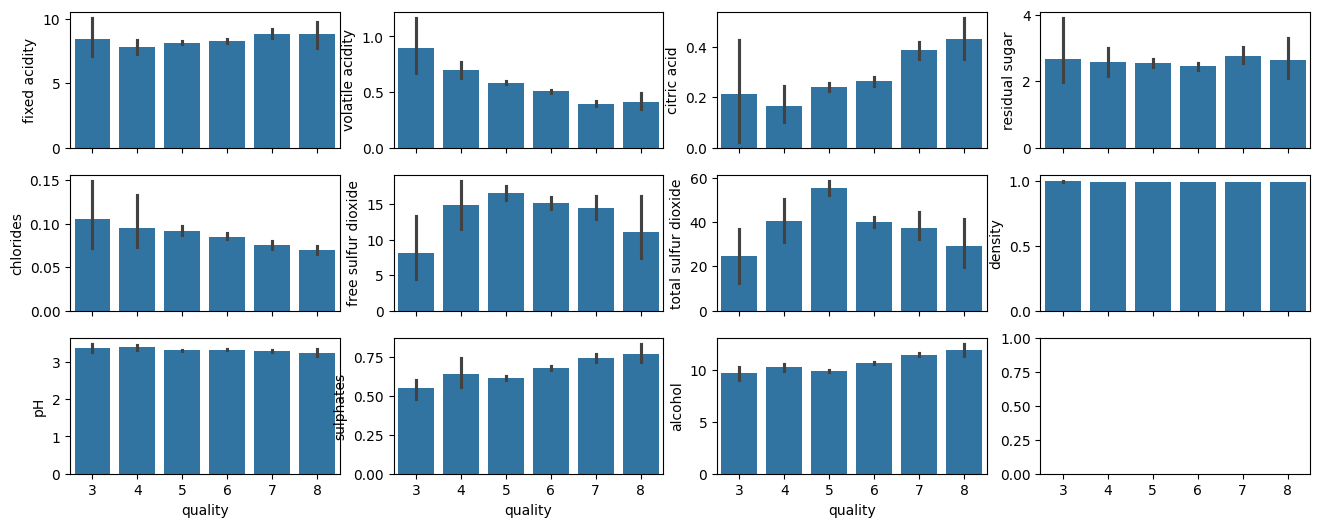

In [27]:
fig,axes = plt.subplots(nrows=3,ncols=4,figsize = (16,6),sharex=True)
sns.barplot(x='quality',y='fixed acidity',data=wine,ax=axes[0][0])
sns.barplot(x='quality',y='volatile acidity',data=wine,ax=axes[0][1])
sns.barplot(x='quality',y='citric acid',data=wine,ax=axes[0][2])
sns.barplot(x='quality',y='residual sugar',data=wine,ax=axes[0][3])

sns.barplot(x='quality',y='chlorides',data=wine,ax=axes[1][0])
sns.barplot(x='quality',y='free sulfur dioxide',data=wine,ax=axes[1][1])
sns.barplot(x='quality',y='total sulfur dioxide',data=wine,ax=axes[1][2])
sns.barplot(x='quality',y='density',data=wine,ax=axes[1][3])

sns.barplot(x='quality',y='pH',data=wine,ax=axes[2][0])
sns.barplot(x='quality',y='sulphates',data=wine,ax=axes[2][1])
sns.barplot(x='quality',y='alcohol',data=wine,ax=axes[2][2])

In [28]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(wine.iloc[:,:-1])

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,wine['quality'],test_size=0.3,random_state=42)

In [36]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model1 = SVR(kernel='linear')
model1.fit(x_train,y_train)
pred = model1.predict(x_test)

# 计算指标
metrics_dict = {
    'r-square': r2_score(y_test, pred),
    'MAE': mean_absolute_error(y_test, pred),
    'MSE': mean_squared_error(y_test, pred)
}

# 创建单行 DataFrame
metrics_df = pd.DataFrame([metrics_dict])
metrics_df

,r-square,MAE,MSE
0,0.338255,0.468475,0.384754


In [37]:
model2 = SVR(kernel='rbf')
model2.fit(x_train,y_train)
pred = model2.predict(x_test)


# 计算指标
metrics_dict = {
    'r-square': r2_score(y_test, pred),
    'MAE': mean_absolute_error(y_test, pred),
    'MSE': mean_squared_error(y_test, pred)
}

# 创建单行 DataFrame
metrics_df = pd.DataFrame([metrics_dict])
metrics_df

,r-square,MAE,MSE
0,0.410125,0.428076,0.342967


wine classifier

In [38]:
wine['quality'].describe()

,quality
count,1143.000000
mean,5.657043
std,0.805824
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


In [39]:
bins = (2,6.5,8)
group_names = ['bad','good']
y = pd.cut(wine['quality'],bins=bins,labels=group_names)
y.value_counts()

,count
quality,
bad,984
good,159


In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

x_train,y_train,x_test,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [60]:
from sklearn.svm import SVC

model3 = SVC(kernel='linear')
model3.fit(x_train,y_train)
pred = model3.predict(x_test)

fpr,tpr,thresholds = roc_curve(y_test,pred)
pd.DataFrame({'accuracy':accuracy_score(y_test,pred),
              'auc':auc(fpr,tpr),
              'precision':precision_score(y_test,pred)})

ValueError: y should be a 1d array, got an array of shape (343, 11) instead.

In [59]:
from sklearn.svm import SVC

model4 = SVC(kernel='rbf')
model4.fit(x_train,y_train)
pred = model4.predict(x_test)

fpr,tpr,thresholds = roc_curve(y_test,pred)
pd.DataFrame({'accuracy':accuracy_score(y_test,pred),
              'auc':auc(fpr,tpr),
              'precision':precision_score(y_test,pred)})

ValueError: y should be a 1d array, got an array of shape (343, 11) instead.